22H1120016 Trần Đăng Nam

Lab 5.3

Thực hiện tương tự bài trên với giải thuật ECLAT và FPGrowth


FPGrowth Results - Frequent Itemsets:
    support               itemsets
0       0.8                 (Milk)
1       0.8                (Bread)
2       0.8               (Diaper)
3       0.6                 (Beer)
4       0.4                 (Coke)
5       0.6          (Milk, Bread)
6       0.6        (Diaper, Bread)
7       0.4  (Diaper, Milk, Bread)
8       0.6         (Diaper, Milk)
9       0.6         (Diaper, Beer)
10      0.4          (Beer, Bread)
11      0.4           (Milk, Beer)
12      0.4  (Diaper, Beer, Bread)
13      0.4   (Diaper, Beer, Milk)
14      0.4         (Diaper, Coke)
15      0.4           (Milk, Coke)
16      0.4   (Diaper, Milk, Coke)

FPGrowth Results - Association Rules:
      antecedents     consequents  support  confidence
0          (Beer)        (Diaper)      0.6         1.0
1   (Beer, Bread)        (Diaper)      0.4         1.0
2    (Milk, Beer)        (Diaper)      0.4         1.0
3          (Coke)        (Diaper)      0.4         1.0
4          (Coke)

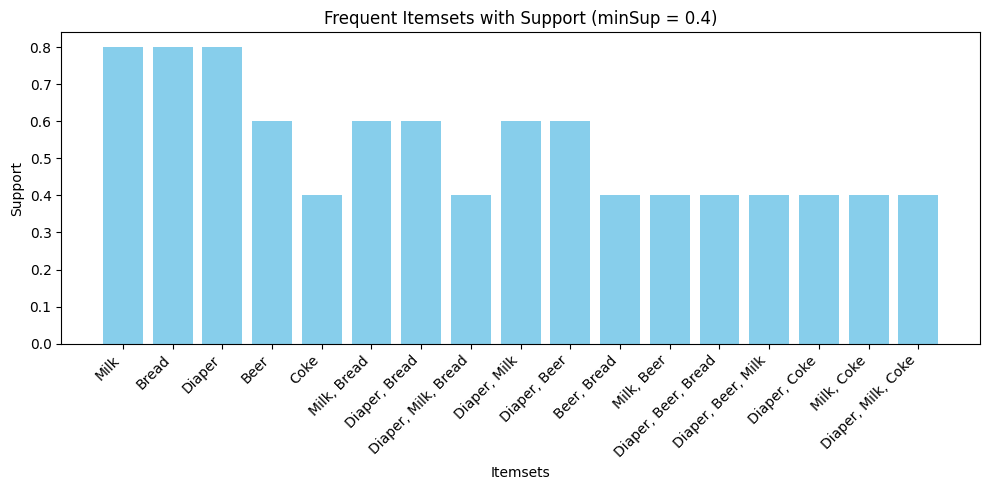

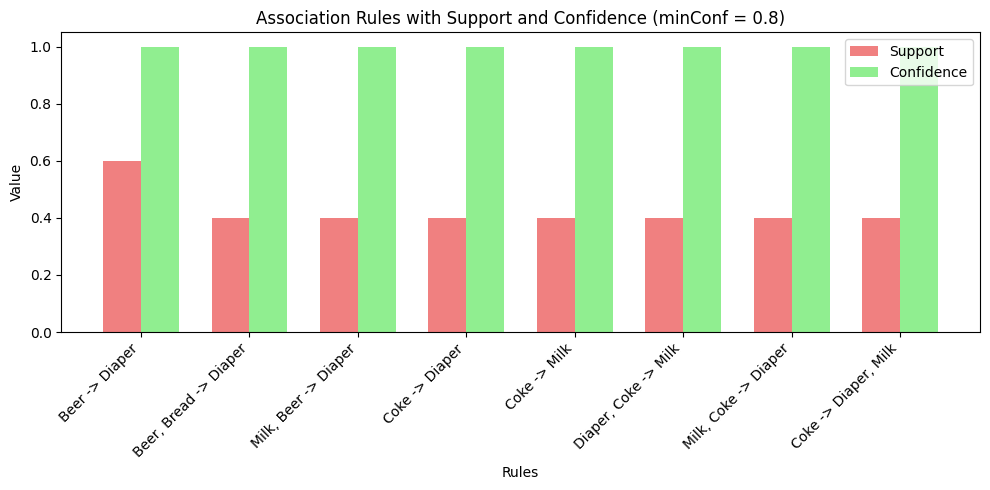

In [1]:
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt

transactions = [
    ['Bread', 'Milk'],
    ['Bread', 'Diaper', 'Beer', 'Eggs'],
    ['Milk', 'Diaper', 'Beer', 'Coke'],
    ['Bread', 'Milk', 'Diaper', 'Beer'],
    ['Bread', 'Milk', 'Diaper', 'Coke']
]

# Bước 1: chuyển data thành one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

minSup = 0.4  # Minimum support (40%)
minConf = 0.8  # Minimum confidence (80%)

# Bước 2: Run FPGrowth
print("\nFPGrowth Results - Frequent Itemsets:")
frequent_itemsets_fpgrowth = fpgrowth(df, min_support=minSup, use_colnames=True)
print(frequent_itemsets_fpgrowth)

# Bước 3: tạo quy luật association rules from FPGrowth
print("\nFPGrowth Results - Association Rules:")
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=minConf)
print(rules_fpgrowth[['antecedents', 'consequents', 'support', 'confidence']])


# Bước 4: Visualize Frequent Itemsets (fpgrowth)
plt.figure(figsize=(10, 5))
itemset_labels = frequent_itemsets_fpgrowth['itemsets'].apply(lambda x: ', '.join(list(x)))
supports = frequent_itemsets_fpgrowth['support']
plt.bar(itemset_labels, supports, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Frequent Itemsets with Support (minSup = 0.4)')
plt.tight_layout()
plt.show()


# Bước 5: Visualize Association Rules (fpgrowth)
plt.figure(figsize=(10, 5))
rule_labels = rules_fpgrowth.apply(lambda x: f"{', '.join(list(x['antecedents']))} -> {', '.join(list(x['consequents']))}", axis=1)
supports = rules_fpgrowth['support']
confidences = rules_fpgrowth['confidence']
x = range(len(rule_labels))
width = 0.35
plt.bar(x, supports, width, label='Support', color='lightcoral')
plt.bar([i + width for i in x], confidences, width, label='Confidence', color='lightgreen')
plt.xticks([i + width/2 for i in x], rule_labels, rotation=45, ha='right')
plt.xlabel('Rules')
plt.ylabel('Value')
plt.title('Association Rules with Support and Confidence (minConf = 0.8)')
plt.legend()
plt.tight_layout()
plt.show()